# Implementação Rotulação


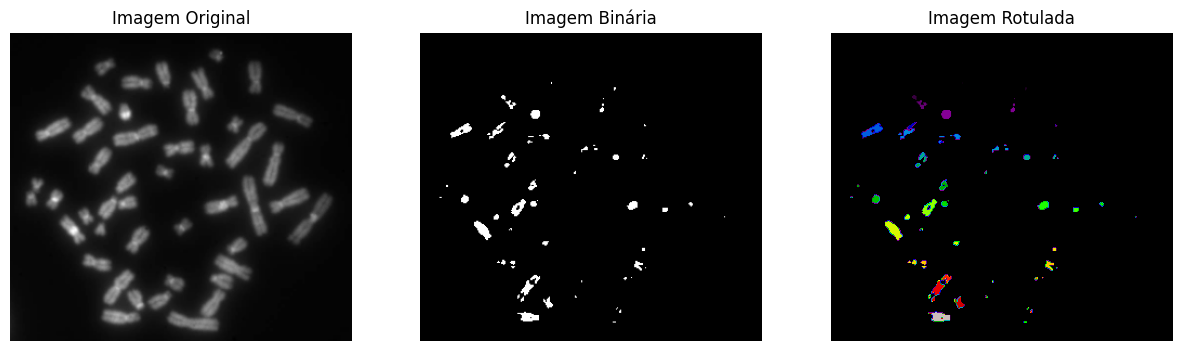

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def transformar_em_binario(imagem, limiar=127):
    """
    Função para transformar a imagem em binária.
    :param imagem: Imagem em escala de cinza.
    :param limiar: Valor de limiar para binarização.
    :return: Imagem binária.
    """
    _, imagem_binaria = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
    return imagem_binaria

def rotular_componentes_conectados(imagem_binaria):
    """
    Função para rotular componentes conectados com conectividade 4.
    :param imagem_binaria: Imagem binária.
    :return: Imagem rotulada.
    """
    linhas, colunas = imagem_binaria.shape
    rotulos = np.zeros_like(imagem_binaria, dtype=int)
    proximo_rotulo = 1
    equivalencia_rotulos = {}

    def encontrar_rotulo(rotulo):
        """
        Encontra a raiz do rótulo.
        :param rotulo: Rótulo atual.
        :return: Raiz do rótulo.
        """
        while rotulo in equivalencia_rotulos:
            rotulo = equivalencia_rotulos[rotulo]
        return rotulo

    def unir_rotulos(rotulo1, rotulo2):
        """
        Une dois rótulos em um único rótulo.
        :param rotulo1: Primeiro rótulo.
        :param rotulo2: Segundo rótulo.
        """
        raiz1 = encontrar_rotulo(rotulo1)
        raiz2 = encontrar_rotulo(rotulo2)
        if raiz1 != raiz2:
            equivalencia_rotulos[raiz2] = raiz1

    for i in range(linhas):
        for j in range(colunas):
            if imagem_binaria[i, j] == 255:  # Pixel é parte de um objeto
                rotulo_esquerda = rotulos[i, j - 1] if j > 0 else 0
                rotulo_acima = rotulos[i - 1, j] if i > 0 else 0
                
                if rotulo_esquerda == 0 and rotulo_acima == 0:
                    # Novo rótulo
                    rotulos[i, j] = proximo_rotulo
                    proximo_rotulo += 1
                elif rotulo_esquerda != 0 and rotulo_acima == 0:
                    # Somente o rótulo à esquerda existe
                    rotulos[i, j] = rotulo_esquerda
                elif rotulo_esquerda == 0 and rotulo_acima != 0:
                    # Somente o rótulo acima existe
                    rotulos[i, j] = rotulo_acima
                else:  # rotulo_esquerda != 0 e rotulo_acima != 0
                    if rotulo_esquerda == rotulo_acima:
                        rotulos[i, j] = rotulo_esquerda
                    else:
                        rotulos[i, j] = min(rotulo_esquerda, rotulo_acima)
                        unir_rotulos(rotulo_esquerda, rotulo_acima)

    # Corrigir rótulos equivalentes
    for i in range(linhas):
        for j in range(colunas):
            if rotulos[i, j] > 0:
                rotulos[i, j] = encontrar_rotulo(rotulos[i, j])

    return rotulos

def exibir_imagens(imagem_original, imagem_binaria, imagem_rotulada):
    """
    Função para exibir as imagens.
    :param imagem_original: Imagem original em escala de cinza.
    :param imagem_binaria: Imagem binária.
    :param imagem_rotulada: Imagem rotulada.
    """
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(imagem_original, cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(imagem_binaria, cmap='gray')
    plt.title('Imagem Binária')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(imagem_rotulada, cmap='nipy_spectral')
    plt.title('Imagem Rotulada')
    plt.axis('off')

    plt.show()

def main():
    """
    Função principal para carregar, processar e exibir as imagens.
    """
    caminho_imagem = "imgs/te1.png"  # Substitua pelo caminho da sua imagem
    imagem = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)

    if imagem is None:
        print("Erro ao carregar a imagem. Verifique o caminho.")
        return

    imagem_binaria = transformar_em_binario(imagem)
    imagem_rotulada = rotular_componentes_conectados(imagem_binaria)

    exibir_imagens(imagem, imagem_binaria, imagem_rotulada)

if __name__ == '__main__':
    main()
